In [15]:
import sys
del sys.modules["helpers2"]

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
import helpers2
import ganuggets2
from joblib import Parallel, delayed,parallel_backend

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

data.npy already exist


In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [20]:
data= np.load("data/data.npy")

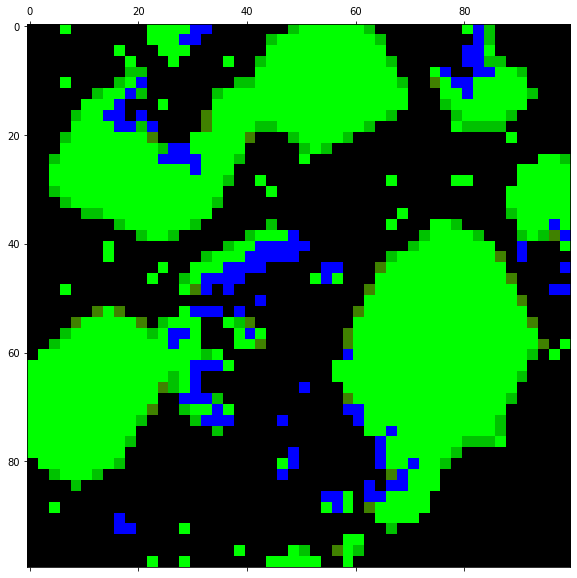

In [24]:
dirName = "data/images"
images = []
paths = []
for file in os.listdir(dirName):
    if (".png" in file):
        paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
paths = sorted(paths,key=lambda x:x[0])
for path in paths:
    img = cv2.imread(path[1])
    images.append(img)
images=np.array(images)
vid = helpers.animate(images[:160,150:250,270:370])
vid.save("mite.mp4")

In [35]:
np.shape(data)

(300, 400, 640)

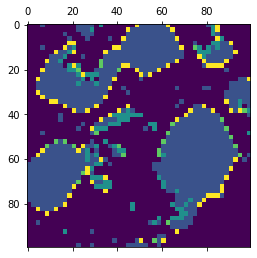

In [5]:
plt.matshow(data[160,150:250,270:370])

In [6]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:160,150:250,270:370],neighborhood,2,-1)

123

4

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
2728

29
30
31
32
33
34
35
36
37
38
39
40
41
42
4344

45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
6162

63
64
6566

67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105106

107
108
109110

111
112
113
114
115
116
117
118
119
120
121122

123
124
125126

127
128
129
130
131
132
133134

135
136
137
138
139
140
141
142
143
144
145146

147
148
149150151

152

153
154
155
156
157
158159



In [7]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [8]:
modelGGA.run()

config saved at saves/Experiment1/05_03_20_17_31_31/config.json
iteration 1
goal = 1goal = 4
goal = 2goal = 3


goal 3 elapsed time: 3.4949848651885986
goal 1 elapsed time: 3.5859999656677246goal = 5

goal 2 elapsed time: 3.7933781147003174goal 4 elapsed time: 3.8193719387054443

goal 5 elapsed time: 1.15852689743042
iteration 2
goal = 1goal = 4
goal = 2goal = 3


goal 4 elapsed time: 0.5105652809143066goal 3 elapsed time: 0.5578708648681641

goal = 5
goal 2 elapsed time: 0.6310718059539795goal 1 elapsed time: 0.6446900367736816

goal 5 elapsed time: 0.2720620632171631
iteration 3
goal = 1goal = 4
goal = 2goal = 3


goal 2 elapsed time: 0.58365797996521
goal = 5goal 1 elapsed time: 0.6289060115814209goal 3 elapsed time: 0.6302199363708496


goal 4 elapsed time: 0.6765871047973633
goal 5 elapsed time: 0.22626090049743652
iteration 4
goal = 1goal = 4
goal = 2goal = 3


goal 3 elapsed time: 0.6062741279602051goal 4 elapsed time: 0.6122817993164062
goal = 5

goal 2 elapsed time: 0.61802101

In [9]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [10]:
np.shape(data)

(1527036, 10)

In [11]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [12]:
modelOCAT.train()

training for value 1
1670
1576
1570
1516
1494
1466
1455
1439
1415
1107
1069
709
662
620
618
551
521
491
488
481
475
470
412
407
406
406
402
398
393
391
388
383
371
365
357
354
344
340
330
322
319
309
307
298
246
246
241
236
235
232
229
229
227
225
223
218
217
213
209
202
202
200
200
200
200
200
199
199
198
192
192
192
192
190
187
186
182
182
179
179
175
173
172
171
171
169
167
166
164
160
159
159
154
154
152
149
148
148
146
145
142
141
140
137
135
133
133
132
132
129
128
128
127
126
124
122
121
121
121
119
119
119
119
118
117
113
113
112
112
111
110
110
110
109
107
107
107
107
107
107
107
107
107
105
105
104
104
103
103
102
99
99
99
99
98
98
98
98
98
98
98
98
98
97
97
97
97
97
97
97
97
96
96
96
96
96
96
96
96
96
96
94
94
94
92
92
92
92
92
90
90
89
89
89
89
89
89
89
89
88
86
86
85
85
85
85
85
85
85
85
85
85
difficult element 100/1000 to delete it
85
84
84
84
84
84
84
84
84
84
84
difficult element 100/1000 to delete it
84
84
84
84
84
83
83
83
82
82
82
82
82
82
81
81
81
81
81
81
81
81
81


[[1,
  [{(0, 4, '>='),
    (2, 4, '>='),
    (4, 2, '<'),
    (6, 4, '>='),
    (7, 3, '>='),
    (8, 3, '>=')},
   {(0, 2, '<'),
    (0, 4, '>='),
    (2, 4, '>='),
    (4, 2, '<'),
    (4, 3, '>='),
    (5, 4, '<'),
    (8, 5, '>=')},
   {(0, 4, '>='), (2, 4, '>='), (3, 4, '<'), (4, 2, '<'), (5, 3, '>=')},
   {(3, 4, '<'), (4, 2, '<'), (6, 2, '>='), (7, 2, '<'), (8, 3, '<')},
   {(3, 3, '>='), (4, 2, '<'), (6, 5, '<'), (7, 5, '<')},
   {(2, 3, '>='), (3, 2, '>='), (4, 2, '<'), (6, 2, '<'), (6, 5, '>=')},
   {(1, 2, '<'),
    (2, 3, '>='),
    (3, 5, '>='),
    (4, 2, '<'),
    (5, 2, '<'),
    (6, 3, '>='),
    (7, 5, '<')},
   {(0, 2, '<'),
    (1, 4, '<'),
    (2, 4, '>='),
    (3, 3, '>='),
    (4, 2, '<'),
    (7, 4, '>='),
    (8, 2, '<')},
   {(4, 2, '<'), (4, 3, '>=')},
   {(1, 2, '>='), (4, 2, '<'), (7, 5, '<')},
   {(2, 4, '<'), (4, 2, '<'), (4, 4, '<')},
   {(4, 2, '<'), (4, 4, '<'), (6, 2, '>=')},
   {(0, 3, '<'),
    (1, 2, '<'),
    (2, 4, '>='),
    (3, 2, '<'),
    (4,

In [21]:
radious = 1
neighborhood = ganuggets2.moore([radious,radious])
paddingType = 2
paddingValue = 0
beta = 2
w1 = 1
w2 = 5
antMaxSize = 50
antMinSize = 3
population = 100
mutationRate = .05
crossprob = .5
noOffsprings = 2
noSteps = 100
print("step 1")
problem = ganuggets2.getLearningProblem(data[:160,150:250,270:370],neighborhood,paddingType,paddingValue)
print("step 2")
matrix = ganuggets2.dictToMat(problem)
print("step 3")
domain = ganuggets2.getDomain(matrix)
print("step 4")
binarized = np.array(ganuggets2.binarize(matrix,domain))
print("step 5")
binDomain = ganuggets2.getDomain(binarized)
print("step 6")

step 1
step 2
step 3
step 4
step 5
step 6


In [22]:
goalAttr = list(binDomain.keys())[-1]
noEvents = ganuggets2.calculateNoEvents([goalAttr],binDomain,binarized)
print("step 7")
fit,pop,fitnessHistory = ganuggets2.ganuggets(population,noOffsprings,antMinSize,antMaxSize,beta,w1,w2,mutationRate,crossprob,binarized,binDomain,goalAttr,noEvents,-1,noSteps)
print("step 8")
bestInd = {}
for f in fit:
    if f[2] not in bestInd:
        bestInd[f[2]] = f
    if f[1] > bestInd[f[2]][1]:
        bestInd[f[2]] = f
bestPop = []
for key in bestInd:
    bestPop.append(pop[bestInd[key][0]])
print("step 9")
rules = ganuggets2.populationPostprocessing(bestPop)
print("step 10")
dRules = ganuggets2.binarizedToDomain(rules,domain)
print(bestInd)
dRules

step 7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
step 8
step 9
step 10
{1: [0, 0.9443788220125708, 1], 3: [101, 0.9331983695556006, 3], 2: [202, 0.8871669042607061, 2], 4: [303, 0.679775363321432, 4], 5: [404, 0.5751040815722902, 5]}


{1: '(A[0] >= 1) and (A[0] < 5) and (A[1] >= 1) and (A[1] < 2) and (A[1] < 3) and (A[2] < 2) and (A[3] >= 1) and (A[3] >= 3) and (A[3] >= 4) and (A[3] < 5) and (A[4] >= 1) and (A[4] < 3) and (A[5] >= 1) and (A[5] < 5) and (A[6] >= 1) and (A[7] >= 1) and (A[8] >= 1) and (A[8] >= 2) and (A[8] >= 3) and (A[8] >= 4)',
 3: '(A[0] >= 1) and (A[0] >= 3) and (A[0] >= 4) and (A[1] >= 1) and (A[3] >= 2) and (A[4] >= 1) and (A[5] >= 1) and (A[5] >= 3) and (A[5] < 4) and (A[6] >= 2) and (A[6] >= 3) and (A[6] >= 5) and (A[7] >= 1) and (A[7] >= 3) and (A[7] < 4) and (A[8] >= 2) and (A[8] >= 3) and (A[8] < 5)',
 2: '(A[0] >= 1) and (A[0] >= 2) and (A[0] >= 5) and (A[1] >= 1) and (A[1] < 3) and (A[1] < 5) and (A[2] >= 2) and (A[2] < 4) and (A[2] < 5) and (A[3] >= 1) and (A[3] >= 2) and (A[4] >= 1) and (A[5] >= 1) and (A[5] >= 2) and (A[5] < 4) and (A[5] < 5) and (A[6] >= 2) and (A[6] >= 3) and (A[7] >= 1) and (A[7] >= 4) and (A[8] >= 1) and (A[8] >= 2)',
 4: '(A[0] >= 1) and (A[2] >= 1) and (A[2] < 5)

In [23]:
funs = {}
for key in dRules:
    temp = "lambda A:"+dRules[key]
    funs[key] = eval(temp)
caganuggetsmodel = CAModel(funs,neighborhood,1,-1)

In [13]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [25]:
data= np.load("data/data.npy")
data = data[:200,150:250,270:370]
data=np.array(data)

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from '/Users/hectormoreno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

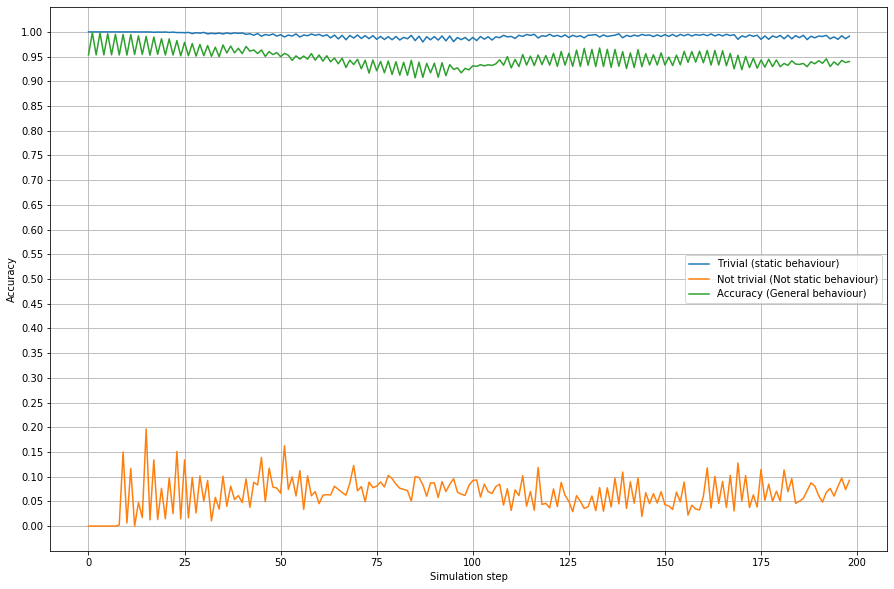

In [15]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from '/Users/hectormoreno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

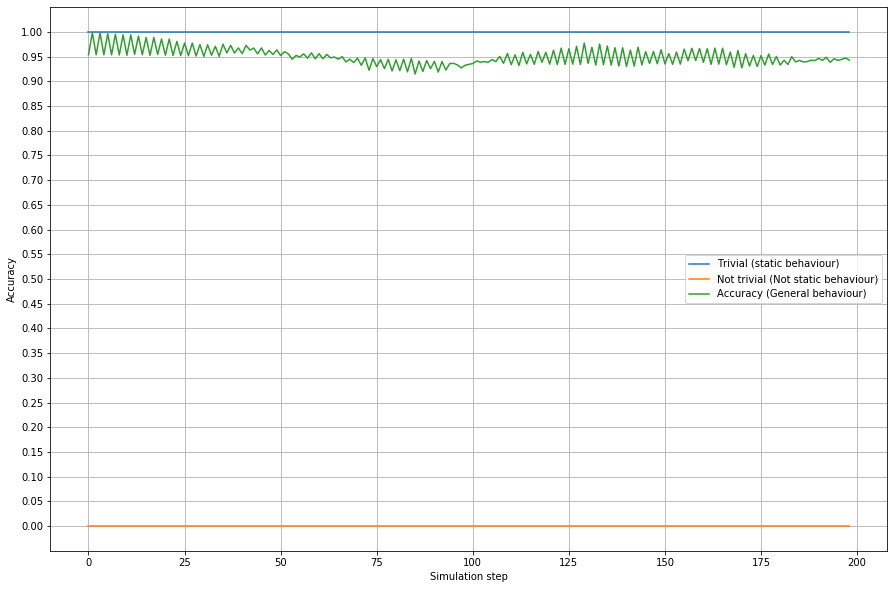

In [16]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

Testing:
state 1/200
Static : 9536/9536
Dynamic : 0/464
Accuracy: 9536 / 10000
state 2/200
Static : 9984/9984
Dynamic : 0/16
Accuracy: 9984 / 10000
state 3/200
Static : 9536/9536
Dynamic : 0/464
Accuracy: 9536 / 10000
state 4/200
Static : 9980/9980
Dynamic : 0/20
Accuracy: 9980 / 10000
state 5/200
Static : 9536/9536
Dynamic : 0/464
Accuracy: 9536 / 10000
state 6/200
Static : 9964/9964
Dynamic : 0/36
Accuracy: 9964 / 10000
state 7/200
Static : 9536/9536
Dynamic : 0/464
Accuracy: 9536 / 10000
state 8/200
Static : 9952/9952
Dynamic : 0/48
Accuracy: 9952 / 10000
state 9/200
Static : 9532/9532
Dynamic : 0/468
Accuracy: 9532 / 10000
state 10/200
Static : 9940/9940
Dynamic : 0/60
Accuracy: 9940 / 10000
state 11/200
Static : 9528/9528
Dynamic : 0/472
Accuracy: 9528 / 10000
state 12/200
Static : 9940/9940
Dynamic : 0/60
Accuracy: 9940 / 10000
state 13/200
Static : 9544/9544
Dynamic : 0/456
Accuracy: 9544 / 10000
state 14/200
Static : 9916/9916
Dynamic : 0/84
Accuracy: 9916 / 10000
state 15/200


<module 'matplotlib.pyplot' from '/Users/hectormoreno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

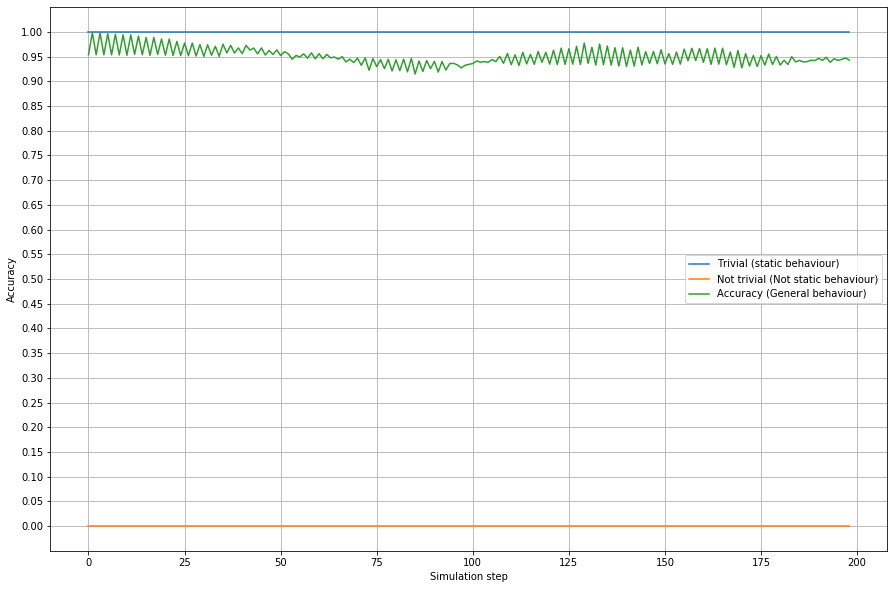

In [26]:
test3 = Testing1(data,caganuggetsmodel,verbose=2)
test3.run()
test3.plot()

<module 'matplotlib.pyplot' from '/Users/hectormoreno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

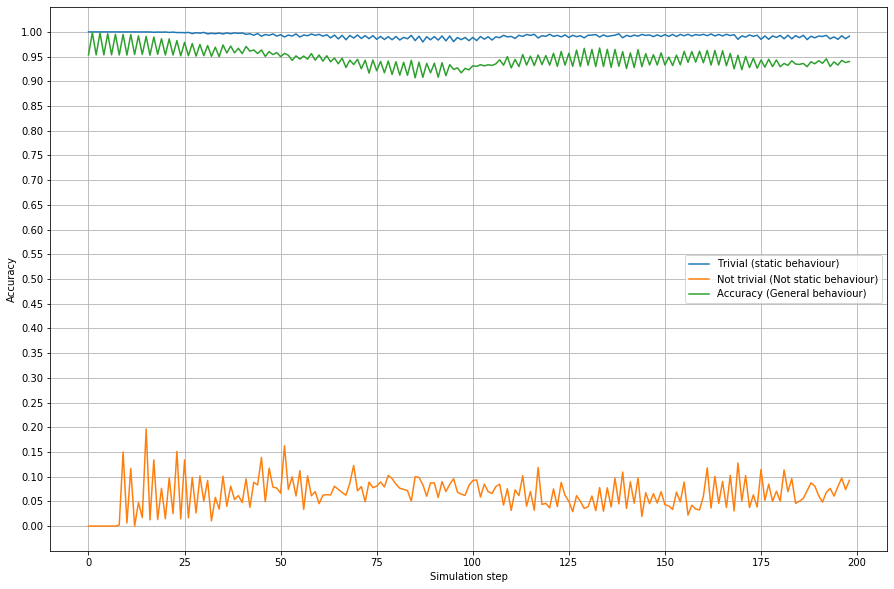

In [17]:
test1.plot()

<module 'matplotlib.pyplot' from '/Users/hectormoreno/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

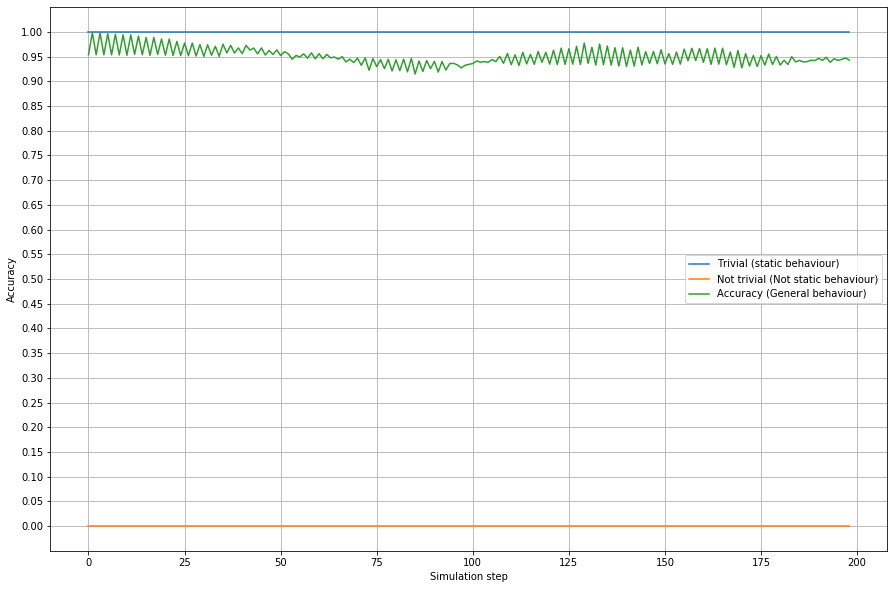

In [18]:
test2.plot()

In [ ]:
test3.plot()

In [19]:
results_path = f"{modelGGA.path}/{modelGGA.date}"
np.savetxt(f"{results_path}/ocat.csv",test1.result,delimiter=",",header="trivial,nontrivial,accuracy")
np.savetxt(f"{results_path}/gga.csv",test2.result,delimiter=",",header="trivial,nontrivial,accuracy")

In [ ]:
np.savetxt(f"nuggets.csv",test3.result,delimiter=",",header="trivial,nontrivial,accuracy")

In [9]:
res,mn,mx,rows,conflicts = helpers2.getBinaryStrings(data,data.shape[1]-1)

getting domains
get row number function
lambda x0,x1,x2,x3,x4,x5,x6,x7,x8:390625*x0+78125*x1+15625*x2+3125*x3+625*x4+125*x5+25*x6+5*x7+1*x8
lambda domain,x:[domain[0][x[0]],domain[1][x[1]],domain[2][x[2]],domain[3][x[3]],domain[4][x[4]],domain[5][x[5]],domain[6][x[6]],domain[7][x[7]],domain[8][x[8]]]
building binary strings
1953124 0
string for key1
string for key4
string for key2
string for key3
string for key5


In [10]:
from pybdm import BDM 

In [11]:
bdm = BDM(ndim=1)
for k in res:
    val = bdm.bdm(res[k], normalized=True)
    print(k,val)

total 0.012150400500956216
1 0.012841701026447005
4 0.010882926849725284
2 0.014010748675381528
3 0.012418179621259847
5 0.012352611187018941


In [12]:
import math
noMinVars = math.ceil(math.log2(mx))
noMinVars

21